In [1]:
#importing the xarray package as a simplified variable
import xarray as xr

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
import cartopy.crs as ccrs

In [5]:
import numpy as np

In [6]:
import dask

In [12]:
from ncar_jobqueue import NCARCluster

In [13]:
cluster = NCARCluster(project='NASP0013')

/glade/u/home/kiarar/.conda/envs/python_tutorial/lib/python3.9/site-packages/distributed/node.py:160: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 35111 instead
  warnings.warn(


In [14]:
cluster

PBSCluster(aa065d14, 'tcp://10.12.206.32:43682', workers=0, threads=0, memory=0 B)

In [9]:
from dask.distributed import Client

In [15]:
client = Client(cluster)

In [16]:
client

Client Scheduler: tcp://10.12.206.32:43682 Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/kiarar/FirstJob/proxy/35111/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [17]:
cluster.adapt(minimum=0, maximum=20)

In [21]:
# All time... from 1979 to 2021
data = '/glade/collections/rda/data/ds633.0/e5.oper.an.sfc/*/e5.oper.an.sfc.128_167_2t.ll025sc.*.nc'

In [22]:
ds = xr.open_mfdataset(data, parallel=True)

In [20]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 744)
Coordinates:
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * time       (time) datetime64[ns] 1979-01-01 ... 1979-01-31T23:00:00
Data variables:
    VAR_2T     (time, latitude, longitude) float32 dask.array<chunksize=(744, 721, 1440), meta=np.ndarray>
    utc_date   (time) int32 dask.array<chunksize=(744,), meta=np.ndarray>
Attributes:
    DATA_SOURCE:          ECMWF: https://cds.climate.copernicus.eu, Copernicu...
    NETCDF_CONVERSION:    CISL RDA: Conversion from ECMWF GRIB1 data to netCDF4.
    NETCDF_VERSION:       4.6.1
    CONVERSION_PLATFORM:  Linux casper05 3.10.0-693.21.1.el7.x86_64 #1 SMP We...
    CONVERSION_DATE:      Mon May 13 19:30:10 MDT 2019
    Conventions:          CF-1.6
    NETCDF_COMPRESSION:   NCO: Precision-preserving compression to netCDF4/HD...
    history:              Mon May 13 19:30:40 2019: ncks -4 --ppc default=7 e...
    NCO:                  netCDF Operators version 4.7.4 (http://nco.sf.net)

In [10]:
# surface temperature 2m from the ground
ds["VAR_2T"]

<xarray.DataArray 'VAR_2T' (time: 744, latitude: 721, longitude: 1440)>
dask.array<open_dataset-c274dd2788bf130eb2930ce2ad3d129aVAR_2T, shape=(744, 721, 1440), dtype=float32, chunksize=(744, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * time       (time) datetime64[ns] 1979-01-01 ... 1979-01-31T23:00:00
Attributes: (12/14)
    long_name:                     2 metre temperature
    short_name:                    2t
    units:                         K
    original_format:               WMO GRIB 1 with ECMWF local table
    ecmwf_local_table:             128
    ecmwf_parameter:               167
    ...                            ...
    grid_specification:            0.25 degree x 0.25 degree from 90N to 90S ...
    rda_dataset:                   ds633.0
    rda_dataset_url:               https:/rda.ucar.edu/datasets/ds633.0/
    rda_dataset_doi:               DOI: 10.5065/BH6N-5N20
    rda_dataset_group:             ERA5 atmospheric surface analysis [netCDF4]
    number_of_significant_digits:  7

In [25]:
# ds.load()
with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    dsnew = ds.where((ds["longitude"]>=-120+360)&(ds["longitude"]<=-65+360)&(ds["latitude"]>=20)&(ds["latitude"]<=50),drop=True)

In [26]:
dsnew

<xarray.Dataset>
Dimensions:    (latitude: 121, longitude: 221, time: 370344)
Coordinates:
  * latitude   (latitude) float64 50.0 49.75 49.5 49.25 ... 20.5 20.25 20.0
  * longitude  (longitude) float64 240.0 240.2 240.5 240.8 ... 294.5 294.8 295.0
  * time       (time) datetime64[ns] 1979-01-01 ... 2021-03-31T23:00:00
Data variables:
    VAR_2T     (time, latitude, longitude) float32 dask.array<chunksize=(744, 121, 221), meta=np.ndarray>
    utc_date   (time, longitude, latitude) float64 dask.array<chunksize=(744, 221, 121), meta=np.ndarray>
Attributes:
    DATA_SOURCE:          ECMWF: https://cds.climate.copernicus.eu, Copernicu...
    NETCDF_CONVERSION:    CISL RDA: Conversion from ECMWF GRIB1 data to netCDF4.
    NETCDF_VERSION:       4.6.1
    CONVERSION_PLATFORM:  Linux casper05 3.10.0-693.21.1.el7.x86_64 #1 SMP We...
    CONVERSION_DATE:      Mon May 13 19:30:10 MDT 2019
    Conventions:          CF-1.6
    NETCDF_COMPRESSION:   NCO: Precision-preserving compression to netCDF4/HD...
    history:              Mon May 13 19:30:40 2019: ncks -4 --ppc default=7 e...
    NCO:                  netCDF Operators version 4.7.4 (http://nco.sf.net)

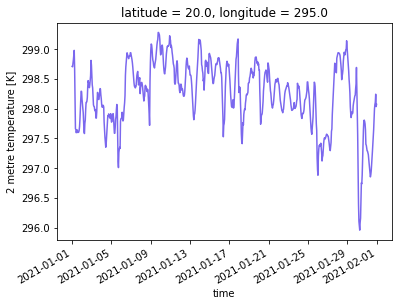

In [13]:
# To plot a graph a t a certain point in time with a given longitude and latitude value
# dsnew["VAR_2T"].isel(longitude=220, latitude=120).plot(color="mediumslateblue")

### This is the Lambert Conformal map code

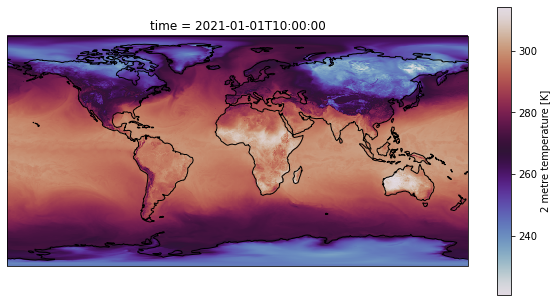

In [14]:
fig = plt.figure(figsize=(8,4))
map_proj = ccrs.LambertConformal(central_longitude=-95, central_latitude=45)
ax = plt.axes([0., 0., 1., 1.], projection=ccrs.PlateCarree())
p = ds["VAR_2T"].isel(time=10).plot(ax = ax, cmap="twilight", transform=ccrs.PlateCarree())
ax.coastlines()
plt.show()

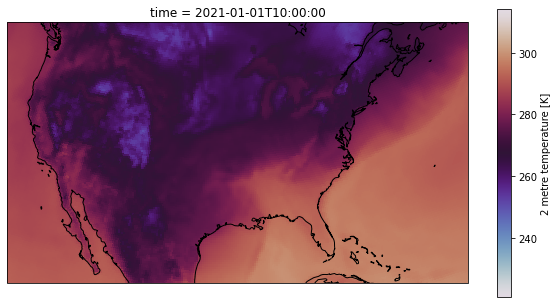

In [15]:
fig = plt.figure(figsize=(8,4))
map_proj = ccrs.LambertConformal(central_longitude=-95, central_latitude=45)
ax = plt.axes([0., 0., 1., 1.], projection=map_proj)
p = ds["VAR_2T"].isel(time=10).plot(ax = ax, cmap="twilight", transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-120,-65,20,50])
plt.show()

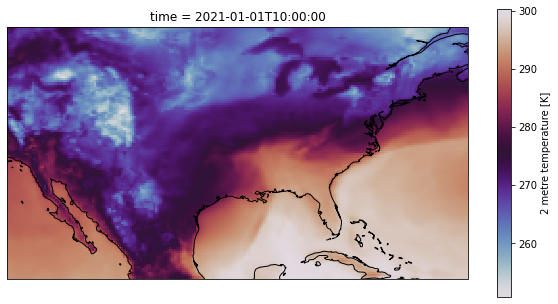

In [32]:
fig = plt.figure(figsize=(8,4))
map_proj = ccrs.LambertConformal(central_longitude=-95, central_latitude=45)
ax = plt.axes([0., 0., 1., 1.], projection=ccrs.PlateCarree())
p = dsnew["VAR_2T"].isel(time=10).plot(ax = ax, cmap="twilight", transform=ccrs.PlateCarree())
ax.coastlines()
ax.margins(x=0, y=0)
plt.show()

# This is the Plate Carree map Code

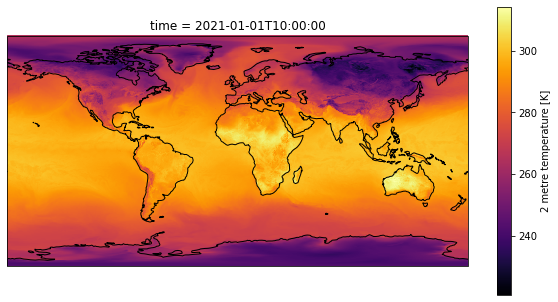

In [17]:
fig = plt.figure(figsize=(8,4))
map_proj = ccrs.PlateCarree(central_longitude=-95)
ax = plt.axes([0., 0., 1., 1.], projection=ccrs.PlateCarree())
p = ds["VAR_2T"].isel(time=10).plot(ax = ax, cmap="inferno", transform=ccrs.PlateCarree())
ax.coastlines()
plt.show()

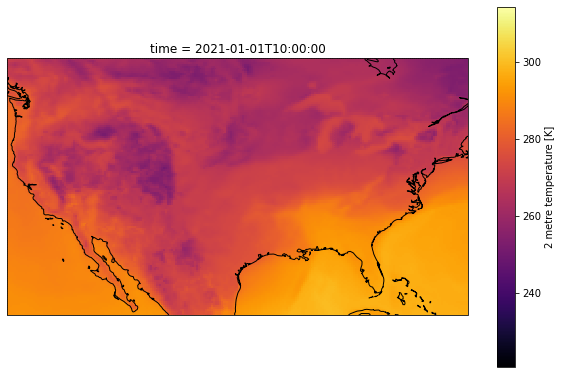

In [18]:
fig = plt.figure(figsize=(8,5))
map_proj = ccrs.PlateCarree(central_longitude=-95)
ax = plt.axes([0., 0., 1., 1.], projection=map_proj)
p = ds["VAR_2T"].isel(time=10).plot(ax = ax, cmap="inferno", transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-125,-70,22.5,50])
plt.show()

### `New dataset to make a new map`

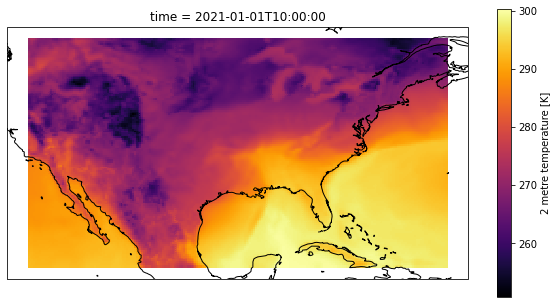

In [19]:
fig = plt.figure(figsize=(8,4))
map_proj = ccrs.PlateCarree(central_longitude=-95)
ax = plt.axes([0., 0., 1., 1.], projection=ccrs.PlateCarree())
p = dsnew["VAR_2T"].isel(time=10).plot(ax = ax, cmap="inferno", transform=ccrs.PlateCarree())
ax.coastlines()
ax.margins(x=0, y=0)
plt.show()

# This is the Mercator map code

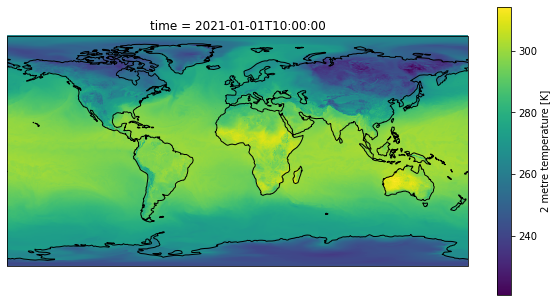

In [20]:
fig = plt.figure(figsize=(8,4))
map_proj = ccrs.Mercator(central_longitude=-95)
ax = plt.axes([0., 0., 1., 1.], projection=ccrs.PlateCarree())
p = ds["VAR_2T"].isel(time=10).plot(ax = ax, cmap="viridis", transform=ccrs.PlateCarree())
ax.coastlines()
plt.show()

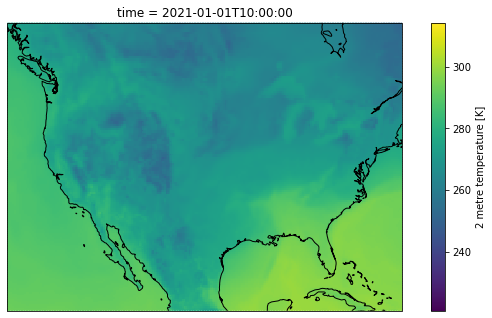

In [21]:
fig = plt.figure(figsize=(8,4))
map_proj = ccrs.Mercator(central_longitude=-95)
ax = plt.axes([0., 0., 1., 1.], projection=map_proj)
p = ds["VAR_2T"].isel(time=10).plot(ax = ax, cmap="viridis", transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-130,-70,20,50])
plt.show()

### `New dataset to make a new map`

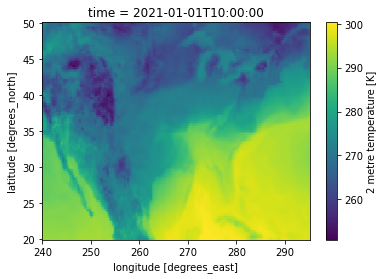

In [22]:
#Plotting latitude and longitude map using a point in time
dsnew["VAR_2T"].isel(time=10).plot(cmap="viridis")

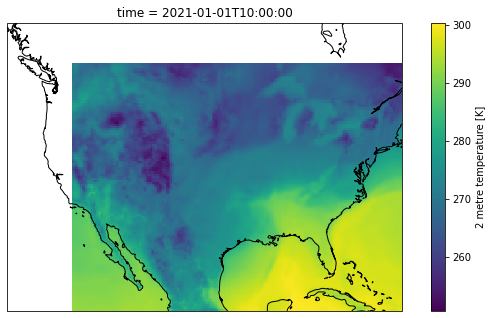

In [23]:
fig = plt.figure(figsize=(8,4))
map_proj = ccrs.Mercator(central_longitude=-95)
ax = plt.axes([0., 0., 1., 1.], projection=map_proj)
p = dsnew["VAR_2T"].isel(time=10).plot(ax = ax, cmap="viridis", transform=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-130,-70,20,50])
ax.margins(x=0, y=0)
plt.show()

# Graphing data into histograms

(array([4.18204000e+05, 6.01274500e+06, 4.61116620e+07, 1.02920838e+08,
        6.11059670e+07, 1.23751146e+08, 1.11116858e+08, 1.81909105e+08,
        1.37560155e+08, 1.54388000e+06]),
 array([211.08359, 221.94124, 232.79889, 243.65656, 254.5142 , 265.37186,
        276.22952, 287.08716, 297.94482, 308.80246, 319.66013],
       dtype=float32),
 <BarContainer object of 10 artists>)

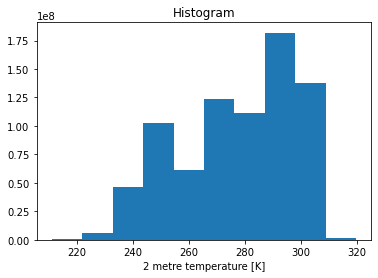

In [24]:
ds["VAR_2T"].plot.hist()

(array([2.415000e+03, 4.741400e+04, 3.914760e+05, 1.329698e+06,
        4.185438e+06, 4.289040e+06, 2.802293e+06, 4.731087e+06,
        2.110690e+06, 5.753000e+03]),
 array([234.70871, 242.3178 , 249.92686, 257.53595, 265.14502, 272.7541 ,
        280.3632 , 287.97226, 295.58133, 303.19043, 310.7995 ],
       dtype=float32),
 <BarContainer object of 10 artists>)

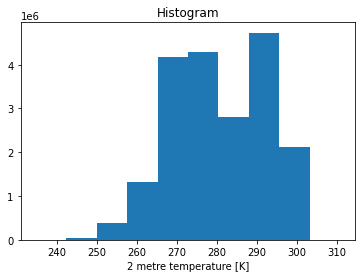

In [25]:
dsnew["VAR_2T"].plot.hist()

# plotting multiple lines of data

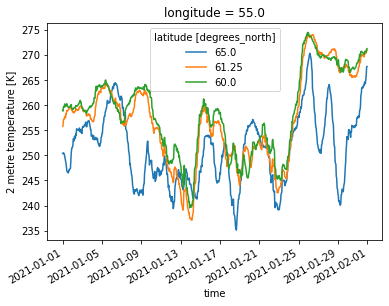

In [29]:
ds["VAR_2T"].isel(longitude=220, latitude=[100,115,120]).plot.line(x="time")

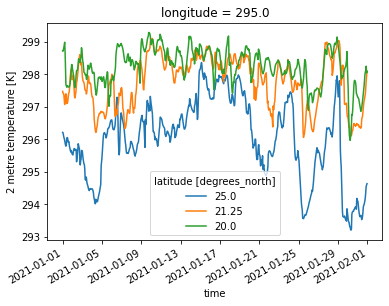

In [26]:
# how to plot 3 different values of latitude at a single longitude over time
dsnew["VAR_2T"].isel(longitude=220, latitude=[100,115,120]).plot.line(x="time")

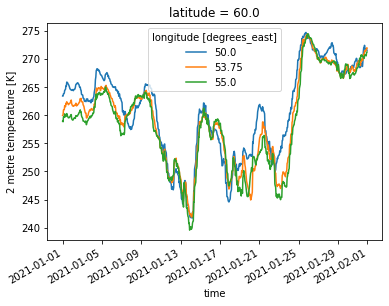

In [30]:
ds["VAR_2T"].isel(longitude=[200,215,220], latitude=120).plot.line(x="time")

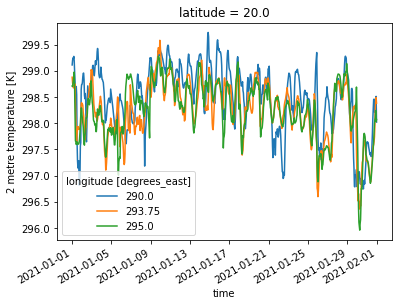

In [27]:
# how to plot 3 different values of longitude at a single latitude over time
dsnew["VAR_2T"].isel(longitude=[200,215,220], latitude=120).plot.line(x="time")

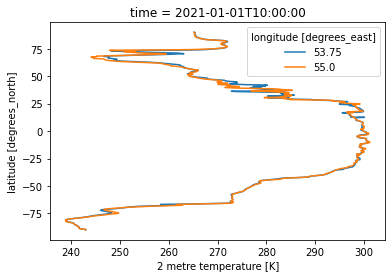

In [31]:
ds["VAR_2T"].isel(time=10, longitude=[215, 220]).plot(y="latitude", hue="longitude")

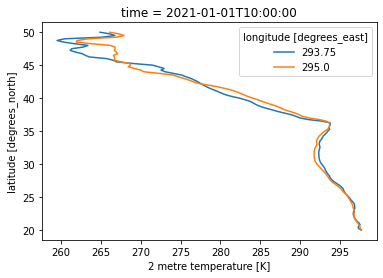

In [28]:
# To plot temperature in a cetain range of longitude at a certain time
dsnew["VAR_2T"].isel(time=10, longitude=[215, 220]).plot(y="latitude", hue="longitude")

In [13]:
dsnew["VAR_2T"]

<xarray.DataArray 'VAR_2T' (time: 744, latitude: 121, longitude: 221)>
array([[[244.87648, 246.5757 , 247.9175 , ..., 271.34326, 271.29443,
         271.19873],
        [246.47804, 248.33156, 248.77101, ..., 271.76904, 271.66162,
         271.562  ],
        [248.75734, 249.46242, 249.90578, ..., 271.71826, 271.6089 ,
         271.37646],
        ...,
        [292.8628 , 292.86865, 292.8706 , ..., 297.0913 , 297.00537,
         297.06006],
        [293.00537, 293.04053, 293.04834, ..., 297.0581 , 297.00146,
         297.0835 ],
        [293.18506, 293.21826, 293.23975, ..., 296.90967, 296.9038 ,
         296.96045]],

       [[244.79361, 247.98306, 249.37369, ..., 271.46158, 271.43423,
         271.39322],
        [246.41275, 249.64713, 250.43033, ..., 271.79166, 271.6862 ,
         271.6354 ],
        [248.444  , 249.98892, 250.77603, ..., 271.80923, 271.70377,
         271.44595],
...
        [292.19214, 292.073  , 291.99487, ..., 297.78394, 297.79565,
         297.79175],
        [292.48315, 292.27222, 292.15308, ..., 297.80933, 297.823  ,
         297.823  ],
        [292.71362, 292.49683, 292.28003, ..., 297.83667, 297.84253,
         297.85815]],

       [[259.30942, 260.0184 , 260.63364, ..., 274.12192, 274.18246,
         274.29575],
        [259.56918, 260.23715, 260.50473, ..., 274.0809 , 274.2645 ,
         274.3934 ],
        [259.4637 , 260.00082, 260.27036, ..., 273.8309 , 274.01645,
         274.1434 ],
        ...,
        [292.118  , 292.0516 , 292.00668, ..., 297.6766 , 297.66684,
         297.68442],
        [292.37973, 292.22543, 292.1649 , ..., 297.69614, 297.69614,
         297.71176],
        [292.6063 , 292.42856, 292.28403, ..., 297.71176, 297.71957,
         297.73715]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 50.0 49.75 49.5 49.25 ... 20.5 20.25 20.0
  * longitude  (longitude) float64 240.0 240.2 240.5 240.8 ... 294.5 294.8 295.0
  * time       (time) datetime64[ns] 1979-01-01 ... 1979-01-31T23:00:00
Attributes: (12/14)
    long_name:                     2 metre temperature
    short_name:                    2t
    units:                         K
    original_format:               WMO GRIB 1 with ECMWF local table
    ecmwf_local_table:             128
    ecmwf_parameter:               167
    ...                            ...
    grid_specification:            0.25 degree x 0.25 degree from 90N to 90S ...
    rda_dataset:                   ds633.0
    rda_dataset_url:               https:/rda.ucar.edu/datasets/ds633.0/
    rda_dataset_doi:               DOI: 10.5065/BH6N-5N20
    rda_dataset_group:             ERA5 atmospheric surface analysis [netCDF4]
    number_of_significant_digits:  7

In [14]:
# mean of all time from 1979 to 2021
dsnew["VAR_2T"].mean(dim="time", skipna=True)

<xarray.DataArray 'VAR_2T' (latitude: 121, longitude: 221)>
array([[259.33118, 259.8851 , 260.12885, ..., 264.98514, 265.14044,
        265.36655],
       [259.63156, 260.29904, 260.64395, ..., 265.31836, 265.45062,
        265.66806],
       [259.802  , 260.865  , 261.21182, ..., 265.554  , 265.68698,
        265.77112],
       ...,
       [292.77374, 292.79413, 292.78738, ..., 297.65344, 297.60382,
        297.58508],
       [292.9761 , 292.99728, 292.98914, ..., 297.6766 , 297.63632,
        297.61722],
       [293.17136, 293.19153, 293.1922 , ..., 297.7025 , 297.6787 ,
        297.65454]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 50.0 49.75 49.5 49.25 ... 20.5 20.25 20.0
  * longitude  (longitude) float64 240.0 240.2 240.5 240.8 ... 294.5 294.8 295.0

In [28]:
dsnewmean = dsnew["VAR_2T"].mean(dim="time", skipna=True)

In [29]:
dsnewmean_comp = dsnewmean.compute()

distributed.utils - ERROR - 
Traceback (most recent call last):
  File "/glade/u/home/kiarar/.conda/envs/python_tutorial/lib/python3.9/site-packages/distributed/utils.py", line 671, in log_errors
    yield
  File "/glade/u/home/kiarar/.conda/envs/python_tutorial/lib/python3.9/site-packages/distributed/scheduler.py", line 6229, in retire_workers
    await self.replicate(
  File "/glade/u/home/kiarar/.conda/envs/python_tutorial/lib/python3.9/site-packages/distributed/scheduler.py", line 5976, in replicate
    assert count > 0
AssertionError
distributed.core - ERROR - Exception while handling op retire_workers
Traceback (most recent call last):
  File "/glade/u/home/kiarar/.conda/envs/python_tutorial/lib/python3.9/site-packages/distributed/core.py", line 498, in handle_comm
    result = await result
  File "/glade/u/home/kiarar/.conda/envs/python_tutorial/lib/python3.9/site-packages/distributed/scheduler.py", line 6229, in retire_workers
    await self.replicate(
  File "/glade/u/home/kia

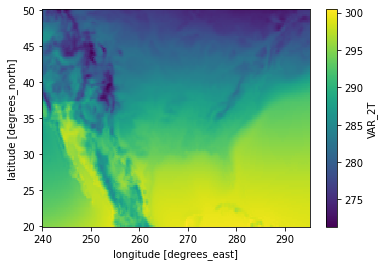

In [31]:
dsnewmean_comp.plot()

In [33]:
dsnewmean_comp.to_netcdf("ERA5mean.nc")

In [32]:
cluster.close()

distributed.client - ERROR - Failed to reconnect to scheduler after 10.00 seconds, closing client
_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=CancelledError()>
asyncio.exceptions.CancelledError


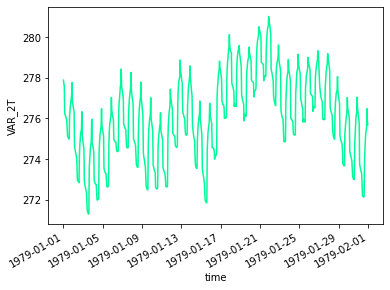

In [22]:
dsnew["VAR_2T"].mean(dim=["latitude", "longitude"], skipna=True).plot(color="mediumspringgreen")

In [16]:
# grouping the data by season
dsnew["VAR_2T"].groupby("time.season").mean(dim="time", skipna=True)

<xarray.DataArray 'VAR_2T' (season: 1, latitude: 121, longitude: 221)>
array([[[259.33118, 259.8851 , 260.12885, ..., 264.98514, 265.14044,
         265.36655],
        [259.63156, 260.29904, 260.64395, ..., 265.31836, 265.45062,
         265.66806],
        [259.802  , 260.865  , 261.21182, ..., 265.554  , 265.68698,
         265.77112],
        ...,
        [292.77374, 292.79413, 292.78738, ..., 297.65344, 297.60382,
         297.58508],
        [292.9761 , 292.99728, 292.98914, ..., 297.6766 , 297.63632,
         297.61722],
        [293.17136, 293.19153, 293.1922 , ..., 297.7025 , 297.6787 ,
         297.65454]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 50.0 49.75 49.5 49.25 ... 20.5 20.25 20.0
  * longitude  (longitude) float64 240.0 240.2 240.5 240.8 ... 294.5 294.8 295.0
  * season     (season) object 'DJF'

In [17]:
# selecting  certain season to work from
dsnew["VAR_2T"].groupby("time.season").mean(dim="time", skipna=True).sel(season="DJF")

<xarray.DataArray 'VAR_2T' (latitude: 121, longitude: 221)>
array([[259.33118, 259.8851 , 260.12885, ..., 264.98514, 265.14044,
        265.36655],
       [259.63156, 260.29904, 260.64395, ..., 265.31836, 265.45062,
        265.66806],
       [259.802  , 260.865  , 261.21182, ..., 265.554  , 265.68698,
        265.77112],
       ...,
       [292.77374, 292.79413, 292.78738, ..., 297.65344, 297.60382,
        297.58508],
       [292.9761 , 292.99728, 292.98914, ..., 297.6766 , 297.63632,
        297.61722],
       [293.17136, 293.19153, 293.1922 , ..., 297.7025 , 297.6787 ,
        297.65454]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 50.0 49.75 49.5 49.25 ... 20.5 20.25 20.0
  * longitude  (longitude) float64 240.0 240.2 240.5 240.8 ... 294.5 294.8 295.0
    season     <U3 'DJF'

In [18]:
dsnew["VAR_2T"].mean(dim=["latitude","longitude"], skipna=True)

<xarray.DataArray 'VAR_2T' (time: 744)>
array([277.88913, 277.7157 , 277.6088 , 276.24295, 276.18884, 276.12457,
       276.0497 , 275.97858, 275.9334 , 275.52118, 275.1275 , 275.07886,
       275.02805, 274.98633, 274.97894, 276.10303, 276.4159 , 276.65527,
       276.83054, 276.99265, 277.14944, 277.76492, 276.79623, 276.70566,
       276.5649 , 276.38986, 276.29803, 274.62595, 274.5078 , 274.39734,
       274.26065, 274.16943, 274.08398, 273.67517, 272.98602, 272.9315 ,
       272.89557, 272.87537, 272.8297 , 274.19717, 274.68314, 275.01575,
       275.23138, 275.3847 , 275.43372, 276.32794, 275.17886, 275.00394,
       274.76614, 274.6604 , 274.47916, 272.901  , 272.75336, 272.64645,
       272.55145, 272.4517 , 272.3687 , 271.99832, 271.4878 , 271.37286,
       271.34158, 271.27835, 271.30463, 273.53134, 273.97302, 274.3158 ,
       274.58243, 274.71524, 274.86807, 275.96405, 274.81253, 274.72888,
       274.62744, 274.49915, 274.35822, 273.0044 , 272.88358, 272.80908,
       272.7696 , 272.7631 , 272.72406, 272.3844 , 271.98322, 271.9714 ,
       271.99725, 272.01953, 272.02902, 274.33362, 274.78943, 275.15247,
       275.32333, 275.495  , 275.6214 , 276.47806, 275.61658, 275.53262,
       275.37375, 275.27014, 275.1415 , 273.49902, 273.45767, 273.3673 ,
       273.33365, 273.27707, 273.2701 , 272.901  , 272.62695, 272.62292,
       272.6147 , 272.63235, 272.69696, 274.79868, 275.41626, 275.71866,
       275.89172, 276.0437 , 276.16803, 277.0339 , 276.39163, 276.28735,
...
       276.93698, 276.87787, 276.76343, 275.96042, 275.957  , 275.9617 ,
       275.95367, 275.9313 , 275.9699 , 277.50964, 277.87152, 278.224  ,
       278.43256, 278.59558, 278.67325, 279.19583, 278.8964 , 278.82077,
       278.6759 , 278.53006, 278.3663 , 276.5821 , 276.44122, 276.36664,
       276.27368, 276.20984, 276.15002, 275.49216, 275.24557, 275.12695,
       275.06577, 274.9977 , 274.97733, 276.37424, 276.77005, 277.0271 ,
       277.25513, 277.32828, 277.36368, 278.06213, 277.32748, 277.21326,
       277.03955, 276.85913, 276.7519 , 275.15668, 275.03986, 274.918  ,
       274.86816, 274.81772, 274.75598, 274.43076, 273.77734, 273.72327,
       273.67712, 273.65698, 273.6649 , 275.2259 , 275.51263, 275.7915 ,
       276.00146, 276.15433, 276.28802, 277.03275, 276.49588, 276.4065 ,
       276.24054, 276.13718, 275.93515, 274.37915, 274.25052, 274.18564,
       274.08722, 274.007  , 273.9264 , 273.48572, 273.13412, 273.07965,
       272.9953 , 272.9849 , 272.98685, 274.7163 , 275.18472, 275.6861 ,
       276.02835, 276.20908, 276.29813, 277.04913, 276.44708, 276.34625,
       276.17938, 275.92487, 275.759  , 273.72766, 273.6108 , 273.52304,
       273.43848, 273.34912, 273.26898, 272.6425 , 272.18442, 272.15924,
       272.1434 , 272.11072, 272.1912 , 273.90604, 274.45657, 274.93616,
       275.26093, 275.43335, 275.53882, 276.47778, 275.83984, 275.68298],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 ... 1979-01-31T23:00:00

In [24]:
dsnew["VAR_2T"].resample(time="AS").mean(dim=["time"], skipna=True)

<xarray.DataArray 'VAR_2T' (time: 1, latitude: 121, longitude: 221)>
array([[[259.33118, 259.8851 , 260.12885, ..., 264.98514, 265.14044,
         265.36655],
        [259.63156, 260.29904, 260.64395, ..., 265.31836, 265.45062,
         265.66806],
        [259.802  , 260.865  , 261.21182, ..., 265.554  , 265.68698,
         265.77112],
        ...,
        [292.77374, 292.79413, 292.78738, ..., 297.65344, 297.60382,
         297.58508],
        [292.9761 , 292.99728, 292.98914, ..., 297.6766 , 297.63632,
         297.61722],
        [293.17136, 293.19153, 293.1922 , ..., 297.7025 , 297.6787 ,
         297.65454]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01
  * latitude   (latitude) float64 50.0 49.75 49.5 49.25 ... 20.5 20.25 20.0
  * longitude  (longitude) float64 240.0 240.2 240.5 240.8 ... 294.5 294.8 295.0

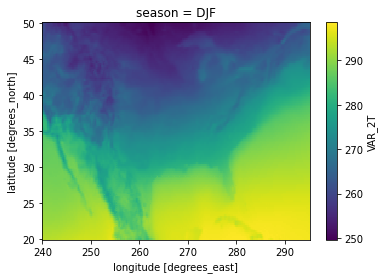

In [26]:
dsnew["VAR_2T"].groupby("time.season").mean(dim="time", skipna=True).sel(season="DJF").plot()